TP2 Exercice 1 : Les bases

1.1)
Dans un système binaire l'information est représenté par des 0 et des 1 (d'où le nom binaire), c'est 0 et 1 sont stockés dans des bits qui peuvent soit être 0 ou 1.
Pour avoir des informations plus complexe que des booléens on utilise l'octet qui est un séquence de 8bits.

1.2)
Dans l'architecture d'un ordinateur pour créer la logique et manipuler l'information contenu dans les bits on utilise des portes:
La porte NOT qui renvoie le bit inverse : 1 -> 0 et 0->1
La porte AND à deux bits si elle recoit deux bits de valeur elle renvoie 1 sinon elle renvoie 0
La porte OR à deuxw bits qui si elle reçoit 10 ou 11 ou 01 renvoie 1 | 00 -> 0
La porte XOR (ou exclusif) renvoie 1 uniquement si UN seul des deux bits qu'elle reçoit est vraie | 11 -> 0

2)
Un qubit peut être soit l'état |0> soit dans l'état |1> soit en superposition quantique càd dans les deux états à la fois :
|ψ⟩ = 𝛼. |0⟩ + 𝛽. |1⟩ , avec la norme du qubit toujours égale 1

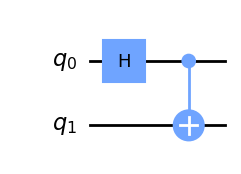

In [7]:
import numpy as np
import time 
from qiskit import *
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import *


#Création d’un circuit quantique à 2 qubits
circ = QuantumCircuit(2)
#Ajouter une porte H pour l’entrée (qubit) 0 => superposition
circ.h(0)
# Ajouter l’opération CNOT avec 0 comme qubit de control et le qubit 1 comme cible
# => état de Bell
circ.cx(0, 1)
#Afficher le circuit :
circ.draw('mpl')


# Exercice 2 : Les portes



#### 1) Porte H :
$$ \text{Porte qui permet de mettre un qubit en superposition quantique avec environ 50\% de |0> et de |1> } $$ 
$$ \begin{bmatrix}
1 & 1 \\
1 & -1 \\
\end{bmatrix}\times\frac{1}{\sqrt{2}}
\quad\text{Matrice de passage H}
\\ $$
$$
H \times q_{0} = H \times \begin{pmatrix}1\\0\end{pmatrix} = \frac{1}{\sqrt{2}} \times \begin{pmatrix}1\\1\end{pmatrix}
\quad \quad \text{ Ici } q_{0} = \ket{0}$$

In [8]:
circ = QuantumCircuit(1,1)
simulator = QasmSimulator()

def hadamar(q0):
    if q0 == 1:
        circ.x(0)
    circ.h(0)
    #Measure :
    circ.measure([0],[0])
    compiled_circuit = transpile(circ, simulator)
    job = simulator.run(compiled_circuit, shots=1000)
    result = job.result()
    counts = result.get_counts(circ)
    print(f"\nProba de qubits de sortie (sur 1000 mesures) :",counts)

    return counts



q0 = int(input("Saisir la 1valeur de q0 :  ex |0>"))
print(f"\n qubits d'entrée : |{q0}> ")
counts = hadamar(q0)

circ.draw('mpl')

ValueError: invalid literal for int() with base 10: ''

#### Porte X (NOT) :
 $$ \text{Porte qui donne l'inverse d'un qubit :}  $$
$$ \begin{pmatrix}
0 & 1 \\ 
1 & 0
\end{pmatrix} \quad \text{Matrice de passage X} \\ $$
$$ \\
X \times q_0 = X \times \begin{pmatrix}1 \\ 0\end{pmatrix} = \begin{pmatrix} 0 \\ 1 \end{pmatrix}
\quad \quad | \quad q_0 = \ket{0} $$

Intialiser le qubit : ex |0>


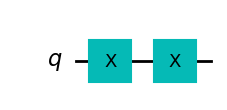

In [ ]:
circ = QuantumCircuit(1)
circ.x(0)
def qubit_not(q0):
    if q0 ==0:
        circ.x(0)
    circ.x(0)

print("Intialiser le qubit : ex |0>")
q0 = int(input("q0 :"))
qubit_not(q0)
circ.draw('mpl')

#### Porte CNOT :
$$ \text{Porte à deux qubit, le premier qubit sert de contrôle, l'autre est celui affecté par le NOT ou non, si le contrôle est vrai (q0 correspond à |1>) alors il y a NOT sur l'autre qubit sinon rien ne se passe:}  $$
$$ \begin{pmatrix}
1&0&0&0 \\ 
0&1&0&0 \\ 
0&0&0&\color{orange}{1} \\ 
0&0&\color{orange}{1}&0 \\ 
\end{pmatrix} \quad \text{Matrice de passage P} \quad \quad \text{| Indication :} \begin{pmatrix}a\\b\\c\\d\end{pmatrix} \begin{matrix}\ket{00}\\\ket{01}\\\ket{10}\\\ket{11}\end{matrix} \\ $$
\\ $$
$$ \\
P \times q_0\:q_1 = P \times \ket{10} = P \times \begin{pmatrix}0\\0\\1\\0\end{pmatrix} = \begin{pmatrix}0\\0\\0\\1\end{pmatrix} = \ket{11}
\quad \quad |\quad q_0 = \ket{1} \quad q_1=\ket{0} \quad \quad \text{Soit leur produit tensoriel : } \ket{10} $$
$$ \\
P \times q_0\:q_1 = P \times \ket{00} = P \times \begin{pmatrix}1\\0\\0\\0\end{pmatrix} = \begin{pmatrix}1\\0\\0\\0\end{pmatrix} = \ket{00}
\quad \quad |\quad q_0 = \ket{1} \quad q_1=\ket{0} \quad \quad \text{On voit que pour |00> rien ne change avec CNOT } $$

Intialiser les qubits : ex |01>

 Qubits d'entrée : |11> 

Proba de qubits de sortie (1000 try) : {'10': 1000}


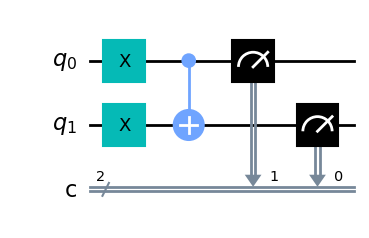

In [ ]:
circ = QuantumCircuit(2,2)
simulator = QasmSimulator()

def cnot(q0, q1):
    if q0 ==1 :
        circ.x(0)
    if q1 ==1 :
        circ.x(1)
    circ.cx(0, 1)
    
    #Measure :
    circ.measure([0,1],[1, 0])
    compiled_circuit = transpile(circ, simulator)
    job = simulator.run(compiled_circuit, shots=1000)
    result = job.result()
    counts = result.get_counts(circ)
    print(f"\nProba de qubits de sortie (1000 try) :",counts)


print("Intialiser les qubits : ex |01>")
q0 = int(input("q0 :"))
q1 = int(input("q1 :"))
print(f"\n Qubits d'entrée : |{q0}{q1}> ")
cnot(q0, q1)
circ.draw('mpl')

#### Porte SWAP :
$$ \text{Porte à deux qubit, le premier qubit sert de contrôle, l'autre est celui affecté par le NOT ou non, si le contrôle est vrai (q0 correspond à |1>) alors il y a NOT sur l'autre qubit sinon rien ne se passe:}  $$
$$ \begin{pmatrix}
1&0&0&0 \\ 
0&0&\color{orange}{1}&0 \\ 
0&\color{orange}{1}&0&0 \\ 
0&0&0&1 \\ 
\end{pmatrix} \quad \text{Matrice de passage P} \\ $$
$$ \\
P \times q_0\:q_1 = P \times \ket{10} = P \times \begin{pmatrix}0\\0\\1\\0\end{pmatrix} = \begin{pmatrix}0\\1\\0\\0\end{pmatrix} = \ket{11}
\quad \quad |\quad q_0 = \ket{1} \quad q_1=\ket{0}$$

Intialiser les qubits : ex |01>

 Qubits d'entrée : |10> 

Proba de qubits de sortie (1000 try) : {'01': 1000}


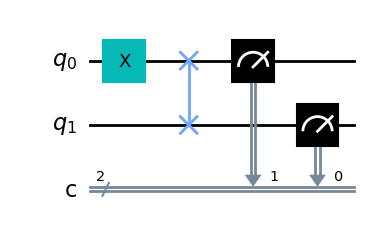

In [ ]:
circ = QuantumCircuit(2,2)
simulator = QasmSimulator()

def swap(q0, q1):
    if q0 ==1 :
        circ.x(0)
    if q1 ==1 :
        circ.x(1)
    circ.swap(0, 1)

    #Measure :
    circ.measure([0,1],[1, 0])
    compiled_circuit = transpile(circ, simulator)
    job = simulator.run(compiled_circuit, shots=1000)
    result = job.result()
    counts = result.get_counts(circ)
    print(f"\nProba de qubits de sortie (1000 try) :",counts)


print("Intialiser les qubits : ex |01>")
q0 = int(input("Saisir q0 :"))
q1 = int(input("Saisir q1 :"))
print(f"\n Qubits d'entrée : |{q0}{q1}> ")
swap(q0, q1)
circ.draw('mpl')

#### Porte CSWAP :
$$ \text{ Porte à 3 qubits qui échangent les valeurs de 2qubits s'ils en ont des différentes et que le premier qubit correspond à une valeur vraie (1):
}  $$
$$ \begin{pmatrix}
1&0&0&0&0&0&0&0 \\ 
0&1&0&0&0&0&0&0 \\ 
0&0&1&0&0&0&0&0 \\ 
0&0&0&1&0&0&0&0 \\ 
0&0&0&0&1&0&0&0 \\ 
0&0&0&0&0&0&\color{orange}{1}&0 \\ 
0&0&0&0&0&\color{orange}{1}&0&0 \\ 
0&0&0&0&0&0&0&1 \\ 
\end{pmatrix} \quad \text{Matrice de passage P} \quad \quad \text{| Indication :} \begin{pmatrix}a\\b\\c\\d\\k\\l\\m\\n\end{pmatrix} \begin{matrix}\ket{000}\\\ket{001}\\\ket{010}\\\ket{011}\\\ket{100}\\\ket{101}\\\ket{110}\\\ket{111}\end{matrix} \\ $$
$$ \\
P \times q_0\:q_1\:q_2 = P \times \ket{101} = P \times \begin{pmatrix}0\\0\\0\\0\\0\\1\\0\\0\end{pmatrix} = \begin{pmatrix}0\\0\\0\\0\\0\\0\\1\\0\end{pmatrix} = \ket{110}
\quad \quad |\quad q_0 = \ket{1} \quad q_1=\ket{0} \quad q_2=\ket{0}$$

Choisir les valeurs d'entrée des 3 qubits | ex : |110>

 qubits d'entrée : |110> 

Proba de qubits de sortie (1000 try) : {'101': 1000}


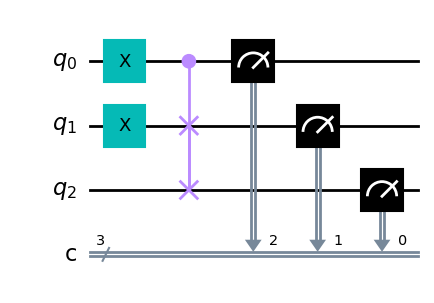

In [ ]:
circ = QuantumCircuit(3,3)
simulator = QasmSimulator()

def ctrlswap(q0, q1, q2):
    if q0 == 1 :
        circ.x(0)
    if q1 == 1 :
        circ.x(1)
    if q2 == 1 :
        circ.x(2)
    circ.cswap(0, 1, 2)
    #Measure :
    circ.measure([0,1,2],[2, 1, 0])
    compiled_circuit = transpile(circ, simulator)
    job = simulator.run(compiled_circuit, shots=1000)
    result = job.result()
    counts = result.get_counts(circ)
    print(f"\nProba de qubits de sortie (1000 try) :",counts)

    
print("Choisir les valeurs d'entrée des 3 qubits | ex : |110>")
q0 = int(input("Entrer la valeur de q0 : "))
q1 = int(input("Entrer la valeur de q1 : "))
q2 = int(input("Entrer la valeur de q2 : "))
print(f"\n qubits d'entrée : |{q0}{q1}{q2}> ")
ctrlswap(q0, q1, q2)
circ.draw('mpl')

#### Porte TOF (CCNOT) :
$$ \text{  Porte à 3 qubits similaire à la porte CNOT sauf qu'il ya deux contrôles cette fois :}  $$
$$ \begin{pmatrix}
1&0&0&0&0&0&0&0 \\ 
0&1&0&0&0&0&0&0 \\ 
0&0&1&0&0&0&0&0 \\ 
0&0&0&1&0&0&0&0 \\ 
0&0&0&0&1&0&0&0 \\ 
0&0&0&0&0&0&1&0 \\ 
0&0&0&0&0&0&0&\color{orange}{1} \\ 
0&0&0&0&0&0&\color{orange}{1}&0 \\ 
\end{pmatrix} \quad \text{Matrice de passage P} \quad \quad \text{| Indication :} \begin{pmatrix}a\\b\\c\\d\\k\\l\\m\\n\end{pmatrix} \begin{matrix}\ket{000}\\\ket{001}\\\ket{010}\\\ket{011}\\\ket{100}\\\ket{101}\\\ket{110}\\\ket{111}\end{matrix} \\ $$
$$ \\
P \times q_0\:q_1\:q_2 = P \times \ket{110} = P \times \begin{pmatrix}0\\0\\0\\0\\0\\0\\1\\0\end{pmatrix} = \begin{pmatrix}0\\0\\0\\0\\0\\0\\0\\1\end{pmatrix} = \ket{111}
\quad \quad |\quad q_0 = \ket{1} \quad q_1=\ket{1} \quad q_2=\ket{0}$$

Choisir les valeurs d'entrée des 3 qubits | ex : |110>

 qubits d'entrée : |101> 

Proba de qubits de sortie (sur 1000 mesures) : {'101': 1000}


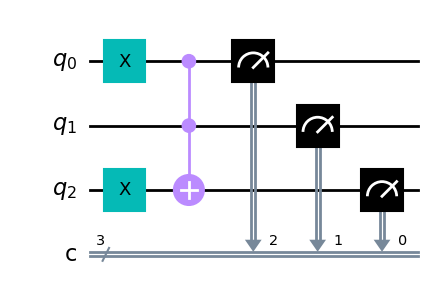

In [ ]:
circ = QuantumCircuit(3,3) 
simulator = QasmSimulator()

def ccnot(q0, q1, q2):
    if q0 == 1 :
        circ.x(0)
    if q1 == 1 :
        circ.x(1)
    if q2 == 1 :
        circ.x(2)
    circ.ccx(0, 1, 2)

    #Measure :
    circ.measure([0,1,2],[2, 1, 0])
    compiled_circuit = transpile(circ, simulator)
    job = simulator.run(compiled_circuit, shots=1000)
    result = job.result()
    counts = result.get_counts(circ)
    print(f"\nProba de qubits de sortie (sur 1000 mesures) :",counts)
    return counts

    
print("Choisir les valeurs d'entrée des 3 qubits | ex : |110>")
q0 = int(input("Entrer la valeur de q0 : "))
q1 = int(input("Entrer la valeur de q1 : "))
q2 = int(input("Entrer la valeur de q2 : "))
print(f"\n qubits d'entrée : |{q0}{q1}{q2}> ")
result = ccnot(q0, q1, q2)
circ.draw('mpl')

2.

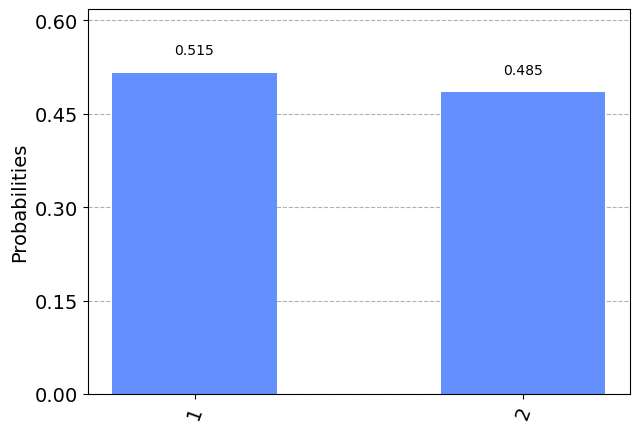

In [ ]:
#Measuring the qubits

"""
circuit.measure([ Qubits ] ,[Classical bits])

simulator = QasmSimulator()
compiled_circuit = transpile(circuit, simulator)
job = simulator.run(compiled_circuit, shots=1000) #by default 1024 shots
result = job.result()
counts = result.get_counts(circuit)  # counts can then be used with the plots
print("\nTotal count for 00 and 11 are:",counts) 
"""
#example :
counts = {'1':515, '2':485}
plot_histogram(counts)



In [ ]:
# Plot the Bloch sphere


#### 4)  Différent SWAP et CSWAP

On à déja vu précedemment ces deux actions à une porte cependant il est aussi possible d'implémenter un swap avec trois portes CNOT :     
  
 $$ CNOT : (x,y) \rightarrow (x, x \oplus y) $$ 
D'après la notation de CNOT on a pour les trois CNOT sachant que la deuxième porte CNOT a la bit de controle sur y : $$\begin{matrix} x \\ \\  y\end{matrix}  \xrightarrow[\text{ }]{\text{1ere porte}} \begin{matrix} x \\ \\ x \oplus y\end{matrix} 
 \xrightarrow[\text{}]{\text{2nd porte} }  \begin{matrix} x \oplus x \oplus y = y \\ \\ x \oplus y\end{matrix} \xrightarrow[\text{}]{\text{3ème porte} }  \begin{matrix} y \\ \\ x \oplus y \oplus y = x\end{matrix} $$ 

Intialiser les qubits : ex |01>

 Qubits d'entrée : |11> 

Proba de qubits de sortie (1000 try) : {'11': 1000}


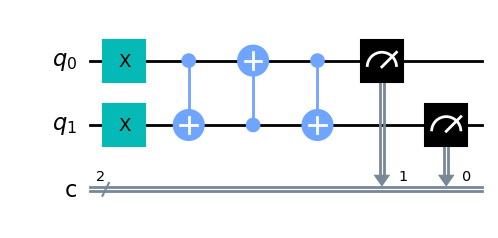

In [6]:
circ = QuantumCircuit(2,2)
simulator = QasmSimulator()

def cnot(q0, q1):
    if q0 ==1 :
        circ.x(0)
    if q1 ==1 :
        circ.x(1)
    circ.cx(0, 1)
    circ.cx(1, 0)
    circ.cx(0, 1)
    
    #Measure :
    circ.measure([0,1],[1, 0])
    compiled_circuit = transpile(circ, simulator)
    job = simulator.run(compiled_circuit, shots=1000)
    result = job.result()
    counts = result.get_counts(circ)
    print(f"\nProba de qubits de sortie (1000 try) :",counts)


print("Intialiser les qubits : ex |01>")
q0 = int(input("q0 :"))
q1 = int(input("q1 :"))
print(f"\n Qubits d'entrée : |{q0}{q1}> ")
cnot(q0, q1)
circ.draw('mpl')
#circ.draw() # Draw with character not an image

